# AIVANCITY : Coding for AI and Data Science
Marie Couvé - confidential

Your name :Likhita Yerra

## Lecture 4 : Regression with Scikit learn



**Don't forget to comment everything you code and analyze your results**

## Presentation of the Bike Sharing Dataset

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

Link for more information: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

### Variable information

	- instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week (1:"monday",
        2:"tuesday",
        3:"wenesday",
        4:"thursday",
        5:"friday",
        6:"saturday",
        0:"sunday")
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
	- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

**Problem : we want to predict the evolution of number of rental bikes in time**

### Start by importing the librairies


In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## Step 1: Data preparation

### Read the dataset

In [2]:
# Load data

df_preprocessed = pd.read_csv("/content/bike-sharing-preprocessed.csv")

### Explore the dataset

In [3]:
df_preprocessed.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
# Get some information
print("Information about the Iris dataset:")
print(df_preprocessed.info())
#The dataset is essentially made up of numerical data, apart from the dtrday column, which is a string. This column should therefore be converted to date type.

Information about the Iris dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17016 entries, 0 to 17015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17016 non-null  int64  
 1   dteday      17016 non-null  object 
 2   season      17016 non-null  int64  
 3   yr          17016 non-null  int64  
 4   mnth        17016 non-null  int64  
 5   hr          17016 non-null  int64  
 6   holiday     17016 non-null  int64  
 7   weekday     17016 non-null  int64  
 8   workingday  17016 non-null  int64  
 9   weathersit  17016 non-null  int64  
 10  temp        17016 non-null  float64
 11  atemp       17016 non-null  float64
 12  hum         17016 non-null  float64
 13  windspeed   17016 non-null  float64
 14  cnt         17016 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 1.9+ MB
None


In [5]:
df_preprocessed.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000
mean,8719.636460,2.516396,0.502997,6.572873,11.503996,0.028914,2.998002,0.682769,1.422308,0.498235,0.477199,0.630960,0.182814,189.833157
std,5009.380243,1.103448,0.500006,3.427822,6.933561,0.167570,2.005194,0.465412,0.635204,0.192770,0.171556,0.190498,0.112016,181.762553
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,1.000000
25%,4393.750000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8697.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.635000,0.164200,142.000000
75%,13075.250000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.253700,282.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.462700,977.000000


### Clean the dataset

In [6]:
# Check for missing values
df_preprocessed.isnull().sum()
#There isn't missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### Explore the dataset (plot)

In [7]:
# Global plot of the evolution of the number of rentals
#Evolution of the number of rentals in 2011
df_filtered = df_preprocessed[(df_preprocessed['yr'] == 0)]
df_aggregated1 = df_filtered.groupby("mnth", as_index=False)["cnt"].sum()
fig = px.bar(df_aggregated1, x="mnth", y="cnt", title="Number of rentals in 2011",
              labels={"cnt": "Total of rentals", "mnth": "Months"}, color='mnth')
fig.show()


In [8]:
#Evolution of the number of rentals in 2012
df_filtered = df_preprocessed[(df_preprocessed['yr'] == 1)]
df_aggregated = df_filtered.groupby("mnth", as_index=False)["cnt"].sum()

fig = px.line(df_aggregated, x="mnth", y="cnt", title="Number of rentals in 2012",
              labels={"cnt": "Total of rentals", "mnth": "Months"})
fig.show()

### Bonus for data preparation

#### More analysis

In [9]:
# Read the original dataset

data = pd.read_csv("bike-sharing.csv", index_col='instant')
data.head(4)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13


In [10]:
# Plots to analyze the seasonality of the bike rentals
#As far as the year of 2011 is concerned
data_filtered = data[(data['yr'] == 0)]
data_aggregated = data_filtered.groupby("season", as_index=False)["cnt"].sum()

fig = px.pie(data_aggregated, values="cnt", names="season",title="Rentals per season in 2011",
              )
fig.show()


In [11]:
#As far as the year of 2012 is concerned
data_filtered2 = data[(data['yr'] == 1)]
data_aggregated2 = data_filtered2.groupby("season", as_index=False)["cnt"].sum()

fig = px.bar(data_aggregated2, x="season", y="cnt", title="Number of rentals in per season 2012",
              labels={"cnt": "Total of rentals", "season": "Season"}, color='season')
fig.show()

**Observations:**

What can you observe from the above plots?

The above plots showed me that bikes are more popular in summer and sping and less in a winter


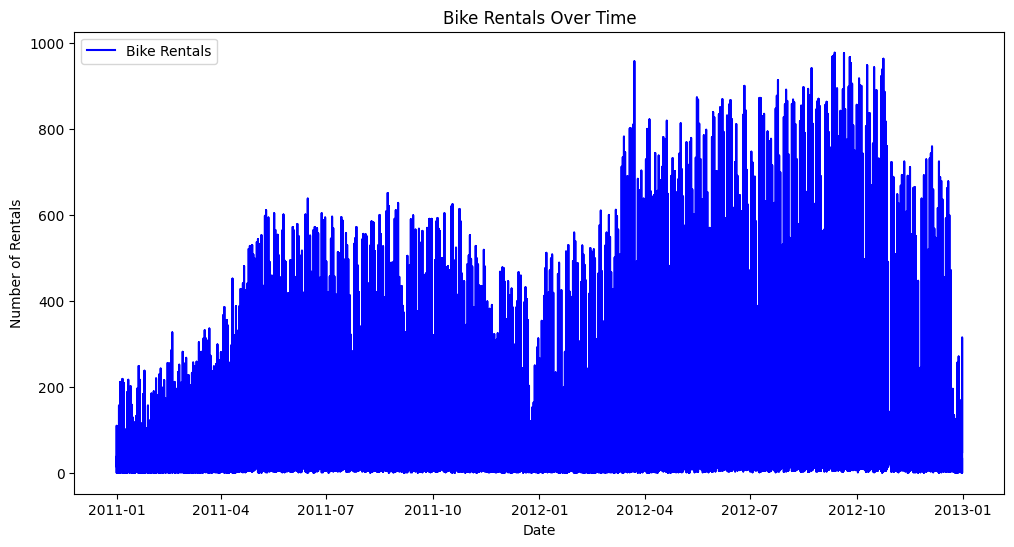

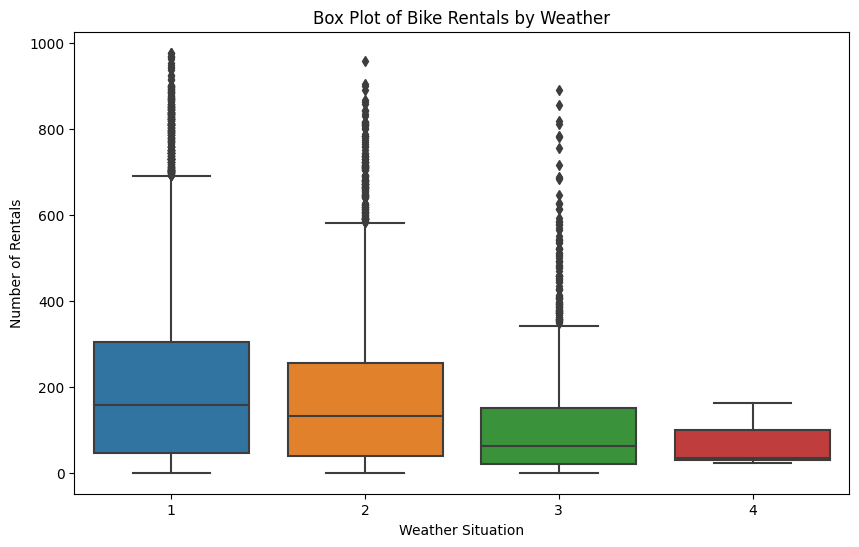

<ipython-input-12-a2100eb7bcca>:25: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




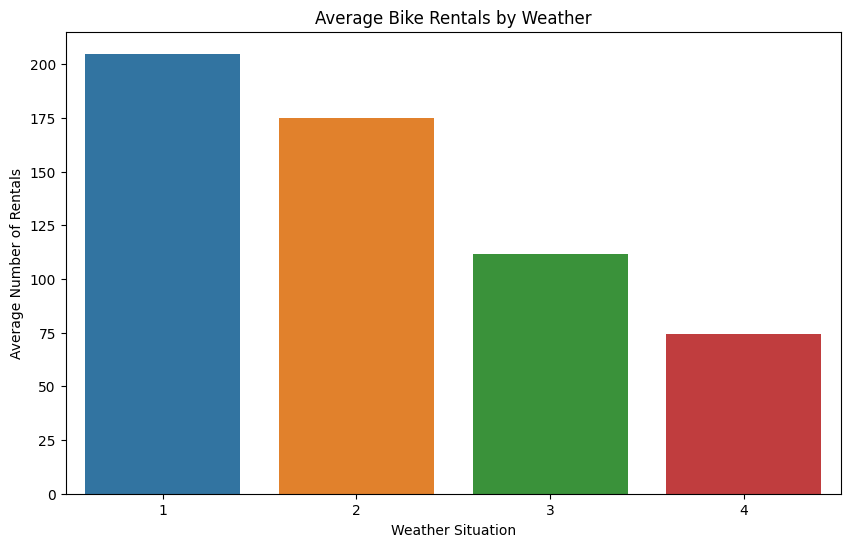

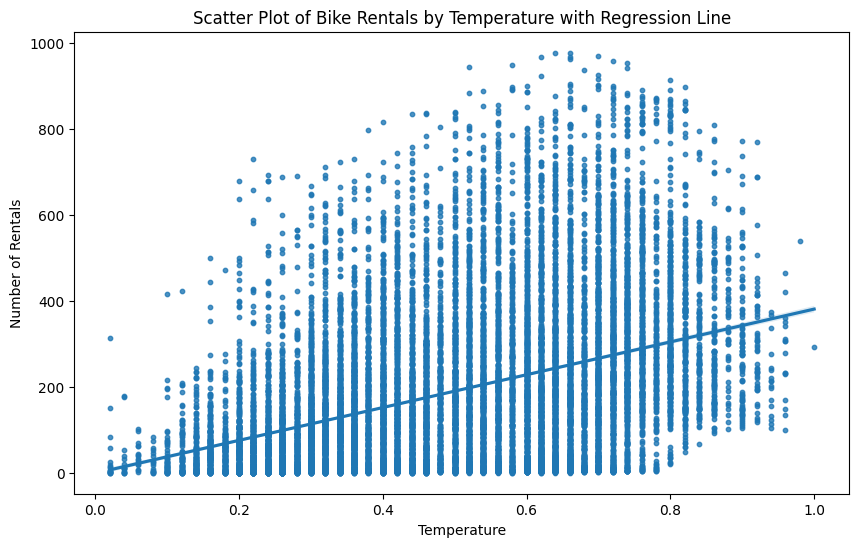

In [12]:
# Plots to analyze the influnence of the weather on bike rentals
import seaborn as sns
# Convert 'dteday' to datetime format
data['dteday'] = pd.to_datetime(data['dteday'])

# 1. Time Series Plot of Bike Rentals Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['dteday'], data['cnt'], label='Bike Rentals', color='blue')
plt.title('Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.legend()
plt.show()

# 2. Box Plot of Bike Rentals by Weather
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title('Box Plot of Bike Rentals by Weather')
plt.xlabel('Weather Situation')
plt.ylabel('Number of Rentals')
plt.show()

# 3. Bar Plot of Average Bike Rentals by Weather
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=data, ci=None)
plt.title('Average Bike Rentals by Weather')
plt.xlabel('Weather Situation')
plt.ylabel('Average Number of Rentals')
plt.show()

# 4. Scatter Plot with Regression Line for Temperature and Bike Rentals
plt.figure(figsize=(10, 6))
sns.regplot(x='temp', y='cnt', data=data, scatter_kws={'s': 10})
plt.title('Scatter Plot of Bike Rentals by Temperature with Regression Line')
plt.xlabel('Temperature')
plt.ylabel('Number of Rentals')
plt.show()


**Observations:**

outliers,decrease in average bike rental




#### Detection of outliers

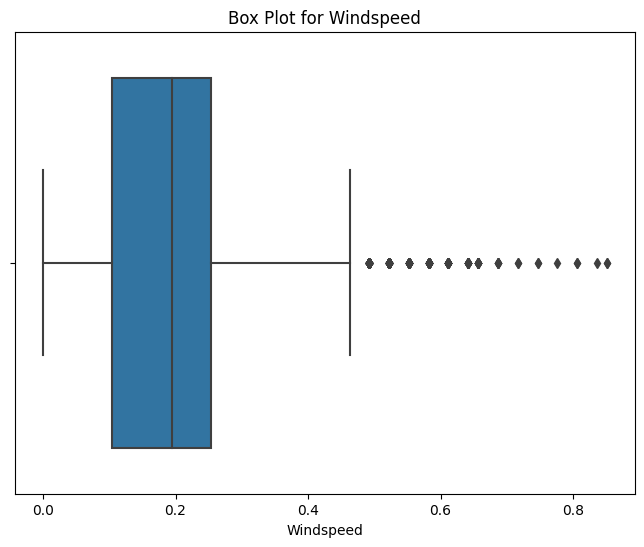

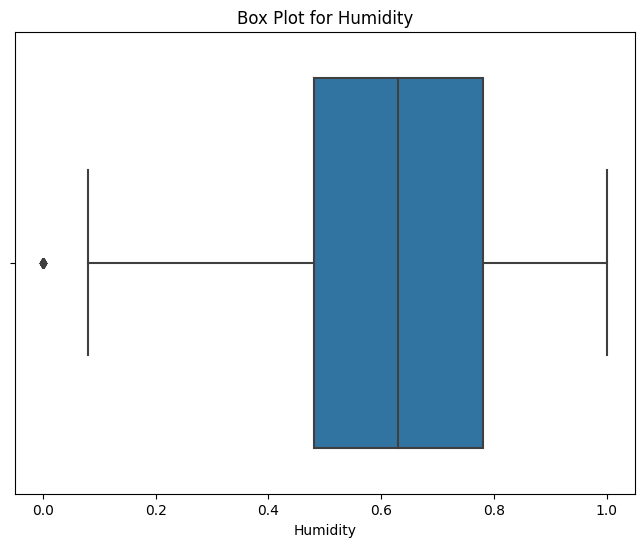

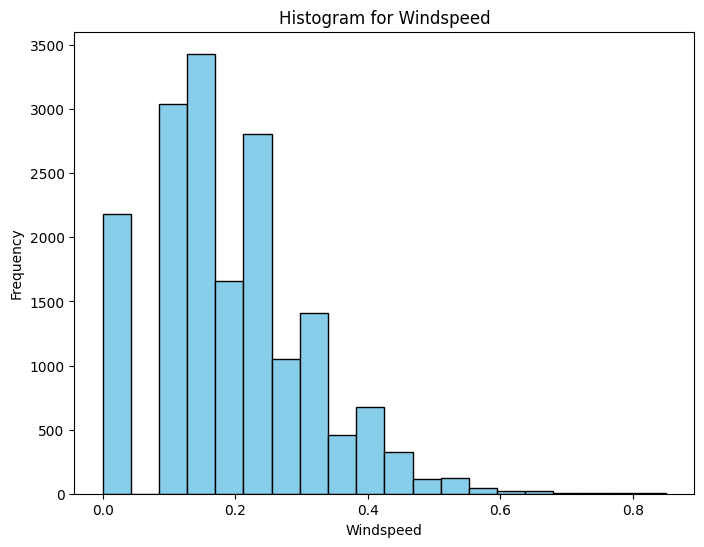

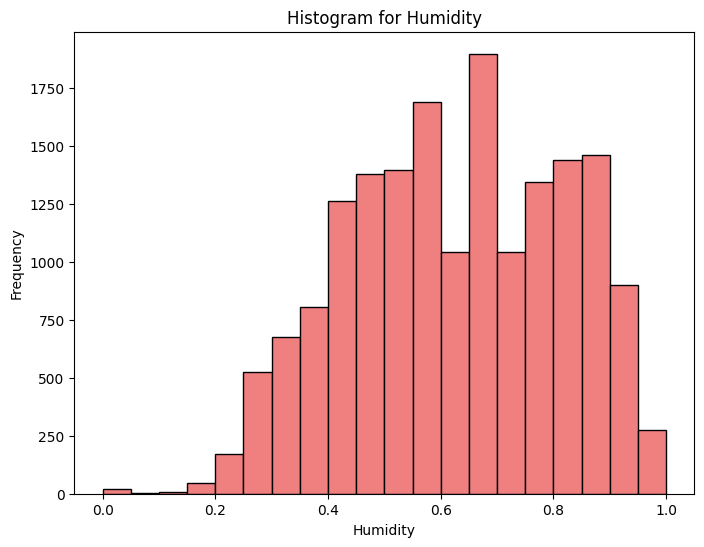

In [13]:
# Plots to detect outliers
# Box Plot for 'windspeed'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['windspeed'])
plt.title('Box Plot for Windspeed')
plt.xlabel('Windspeed')
plt.show()

# Box Plot for 'humidity'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['hum'])
plt.title('Box Plot for Humidity')
plt.xlabel('Humidity')
plt.show()
# Histogram for 'windspeed'
plt.figure(figsize=(8, 6))
plt.hist(data['windspeed'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for Windspeed')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'humidity'
plt.figure(figsize=(8, 6))
plt.hist(data['hum'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram for Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()


In [14]:
# Count the outliers that will need to be removed for the windspeed column

# Calculate the IQR for 'windspeed'
Q1_ws = data['windspeed'].quantile(0.25)
Q3_ws = data['windspeed'].quantile(0.75)
IQR_ws = Q3_ws - Q1_ws

# Identify outliers for 'windspeed'
outliers_ws = ((data['windspeed'] < (Q1_ws - 1.5 * IQR_ws)) | (data['windspeed'] > (Q3_ws + 1.5 * IQR_ws)))

# Count the number of outliers
count_outliers_ws = outliers_ws.sum()

print(f"Number of outliers for 'windspeed': {count_outliers_ws}")


Number of outliers for 'windspeed': 342


In [15]:
# Count the outliers that will need to be removed for the humidity column

# Calculate the IQR for 'humidity'
Q1_hum = data['hum'].quantile(0.25)
Q3_hum = data['hum'].quantile(0.75)
IQR_hum = Q3_hum - Q1_hum

# Identify outliers for 'humidity'
outliers_hum = ((data['hum'] < (Q1_hum - 1.5 * IQR_hum)) | (data['hum'] > (Q3_hum + 1.5 * IQR_hum)))

# Count the number of outliers
count_outliers_hum = outliers_hum.sum()

print(f"Number of outliers for 'humidity': {count_outliers_hum}")


Number of outliers for 'humidity': 22


In [16]:
# Calculate the percentage of data to be removed for 'windspeed'
percentage_removed_ws = (count_outliers_ws / len(data)) * 100

# Calculate the percentage of data to be removed for 'humidity'
percentage_removed_hum = (count_outliers_hum / len(data)) * 100

print(f"Percentage of data to be removed for 'windspeed': {percentage_removed_ws:.2f}%")
print(f"Percentage of data to be removed for 'humidity': {percentage_removed_hum:.2f}%")


Percentage of data to be removed for 'windspeed': 1.97%
Percentage of data to be removed for 'humidity': 0.13%


**Observations:**

Can we remove the outliers without loosing too much data?
yes as percentage of the data to be removed is small


#### Correlations

<ipython-input-17-1e27afda7705>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



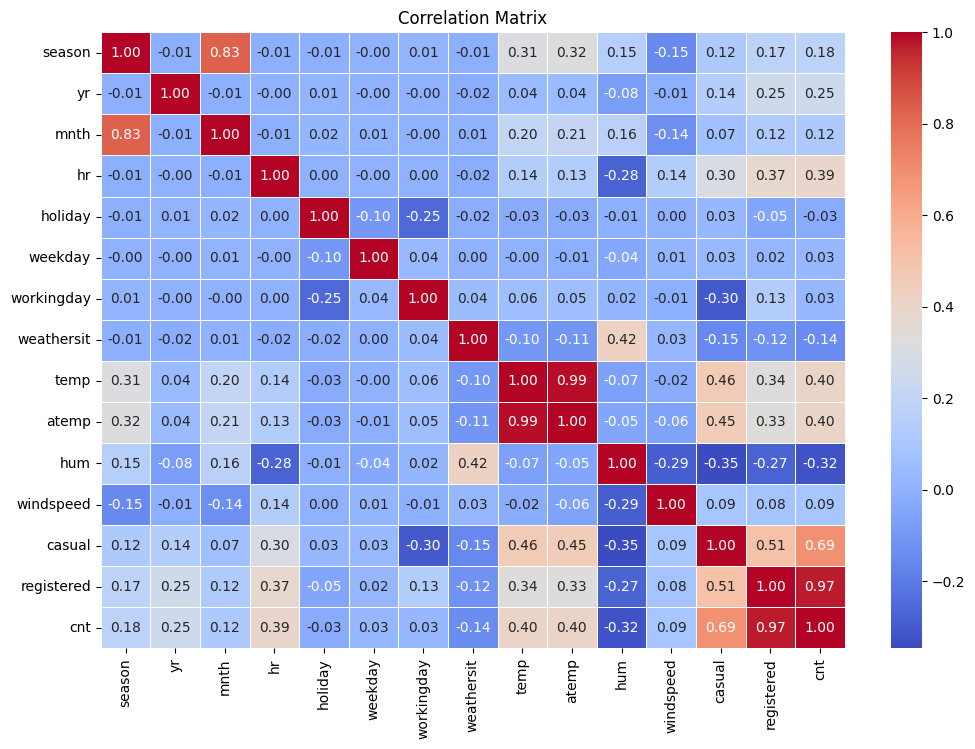

In [17]:
# Observe correlations

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<ipython-input-18-f50eb1fc512c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Correlations with 'cnt' column:
cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


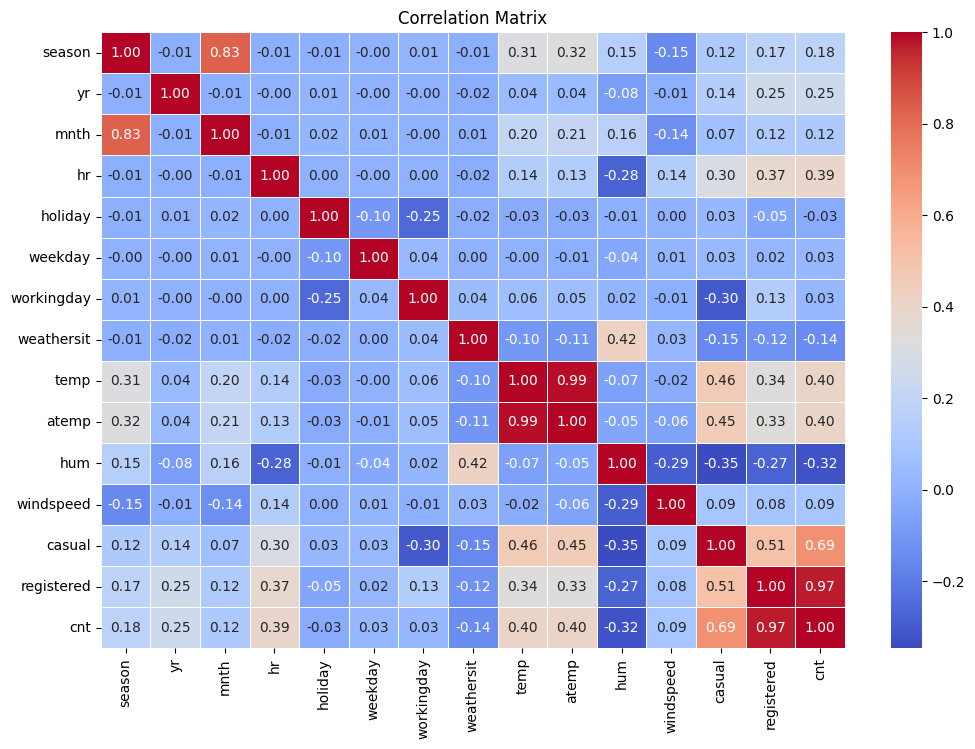

In [18]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Filter correlations with the 'cnt' column
cnt_correlations = correlation_matrix['cnt'].sort_values(ascending=False)

# Print correlations with the 'cnt' column
print("Correlations with 'cnt' column:")
print(cnt_correlations)

# Create a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Observations:**

What can you say from the matrix correlation? Which features are correlated with the "cnt" column (target column)?
         whether increasing, decreasing
registered    
casual        
temp        
atemp         
hr            
yr            
season       
mnth          
windspeed     
workingday    
weekday       
holiday     
weathersit   
hum          


#### Preparation based on our previous observations

In [20]:
# Remove the outliers
data = data[~outliers_ws].reset_index(drop=True)


In [28]:
# Remove the correlated columns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set a correlation threshold (adjust as needed)
correlation_threshold = 0.8

# Find and remove highly correlated columns
correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_columns.add(colname)

# Drop the highly correlated columns
data = data.drop(columns=correlated_columns, axis=1)


<ipython-input-28-88dde99d6ffa>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### Separate features from target


In [29]:
# Get the features and target in two variables.
# The target is the 'cnt' column.
x=df_preprocessed['cnt']
y=df_preprocessed.drop(['cnt','dteday'],axis=1)


### Train / test split

In [30]:
# Split the features and target in train and test set

X_train, X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [31]:
# Print the shape of each
# Check that X and y of each set have the same number of samples

print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

(13612,)
(3404,)
(3404, 13)
(13612, 13)


## Step 2: Model Training

In [32]:
# Instantiate your model
model = LinearRegression()


In [33]:
# Train your model
model.fit(Y_train,X_train)

LinearRegression()

## Step 3: Evaluate your model

### Compute scores and metrics

In [34]:
# Compute the score of your model

print(model.score(Y_train,X_train))
model.score(Y_test,X_test)

0.39182144704350275


0.3850005854787615

In [35]:
# Predict the target using the trained model
target_pred=model.predict(Y_test)
print(target_pred)

[128.37811921 349.32624064 194.30431234 ... 180.51691969  87.25084778
  23.15618045]


In [36]:
# Compute the MAE on train and test
mae=mean_absolute_error(X_test,target_pred)
print(mae)


106.23652303295084


### Explore the predictions

In [37]:
# Plot the true values and the predictions on the test set
trace_reelles = go.Scatter(x=list(range(1, len(X_test) + 1)), y=X_test, mode='lines+markers', name='Réel')

#creating trace for predictions
trace_predictions = go.Scatter(x=list(range(1, len(target_pred) + 1)), y=target_pred, mode='lines+markers', name='Prédiction')

#creating the layout
layout = go.Layout(title='Real vs. Prediction',
                   xaxis=dict(title='test samples'),
                   yaxis=dict(title='Number of sales'))

# creating the figure
fig = go.Figure(data=[trace_reelles, trace_predictions], layout=layout)


fig.show()

**Observations:**

What can you say about the predictions? What's the problem?
The model used for this prediction performs below average. Consequently, the predictions are not accurate.

## Bonus : Try other models and analyze the best !

You can try
- Lasso
- Random Forest Regressor
- Ridge

Train and evaluate each model. Comment your results.

In [38]:
#Lasso
#model training
model2=Lasso()
model2.fit(Y_train,X_train)
#Compute the score
print(model2.score(Y_test,X_test))
# Predict the target using the trained model
target_pred1=model2.predict(Y_test)
# Compute the MAE on train and test
mae1=mean_absolute_error(X_test,target_pred1)
print(mae1)


0.38301952903072023
105.85512614036011


In [39]:
#RandomForestRegressor
#model training
model3=RandomForestRegressor()
model3.fit(Y_train,X_train)
#Compute the score
print(model3.score(Y_test,X_test))
# Predict the target using the trained model
target_pred2=model3.predict(Y_test)
# Compute the MAE on train and test
mae2=mean_absolute_error(X_test,target_pred2)
print(mae2)

0.9562035487094549
23.396977085781433


In [40]:
# Plot the true values and the predictions on the test set
trace_reelles1 = go.Scatter(x=list(range(1, len(X_test) + 1)), y=X_test, mode='lines+markers', name='Réel')

# creating trace for predictions
trace_predictions1 = go.Scatter(x=list(range(1, len(target_pred2) + 1)), y=target_pred2, mode='lines+markers', name='Prédiction')

# Creating layout
layout1 = go.Layout(title='Real vs. Prediction',
                   xaxis=dict(title='test samples'),
                   yaxis=dict(title='Number of sales'))

# creating figure
fig = go.Figure(data=[trace_reelles1, trace_predictions1], layout=layout1)


fig.show()

In [41]:
#Ridge
#model training
model4=Ridge()
model4.fit(Y_train,X_train)
#Compute the score
print(model4.score(Y_test,X_test))
# Predict the target using the trained model
target_pred3=model4.predict(Y_test)
# Compute the MAE on train and test
mae3=mean_absolute_error(X_test,target_pred3)
print(mae3)

0.3851224427649581
106.21022392995145


Giving those differents scores, the best model is genuinely RandomForestRegressor